<a href="https://colab.research.google.com/github/First-light-4/SCP_task2/blob/main/Cloths_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
%matplotlib inline

In [58]:
from pylab import imshow

In [59]:
import numpy as np

In [60]:
import cv2

In [61]:
import torch

In [62]:
import albumentations as albu

In [63]:
!pip install iglovikov_helper_functions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [65]:
!wget https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg > /dev/null

--2023-03-04 09:22:56--  https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg
Resolving habrastorage.org (habrastorage.org)... 51.89.30.72
Connecting to habrastorage.org (habrastorage.org)|51.89.30.72|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://hsto.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg [following]
--2023-03-04 09:22:56--  https://hsto.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg
Resolving hsto.org (hsto.org)... 172.67.71.175, 104.26.12.161, 104.26.13.161, ...
Connecting to hsto.org (hsto.org)|172.67.71.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55211 (54K) [image/jpeg]
Saving to: ‘eml7crxnxftrimsmolwjegqcrp4.jpeg.1’

eml7crxnxftrimsmolw 100%[===================>]  53.92K  --.-KB/s    in 0.001s  

2023-03-04 09:22:57 (53.4 MB/s) - ‘eml7crxnxftrimsmolwjegqcrp4.jpeg.1’ saved [55211/55211]



In [66]:
!pip install cloths_segmentation  > /dev/null

In [67]:
from cloths_segmentation.pre_trained_models import create_model

In [68]:
model = create_model("Unet_2020-10-30")

/usr/local/lib/python3.8/dist-packages/torch/hub.py:651: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


In [69]:
model.eval();

In [70]:
image = load_rgb("eml7crxnxftrimsmolwjegqcrp4.jpeg")

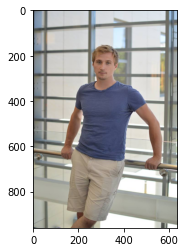

In [71]:
imshow(image)

In [72]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)

In [73]:
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

In [74]:
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

In [75]:
with torch.no_grad():
  prediction = model(x)[0][0]

In [77]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)

In [78]:
mask = unpad(mask, pads)

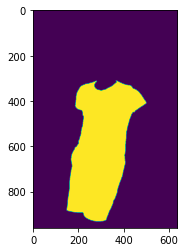

In [79]:
imshow(mask)

In [84]:
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 0)).astype(np.uint8), 0.5, 0)

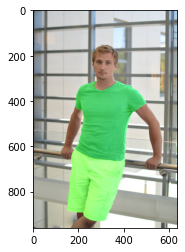

In [85]:
imshow(dst)

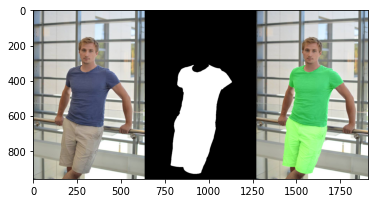

In [86]:
imshow(np.hstack([image, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255, dst]))

In [90]:
from PIL import Image
def preprocess(cloth):
  img = Image.open(cloth)
  img.show()  
  # returns/saves blue_background_cloth
  return cloth 

In [91]:
!git clone https://github.com/First-light-4/SCP_task2.git

fatal: destination path 'SCP_task2' already exists and is not an empty directory.


In [92]:
import random
rand = random.randint(0, 105)
img = Image.open(f'/content/SCP_task2/cloths/img{rand}.jpeg')

In [93]:
model = create_model("Unet_2020-10-30")
model.eval();

In [295]:
image = load_rgb(f'/content/SCP_task2/cloths/img{rand}.jpeg')

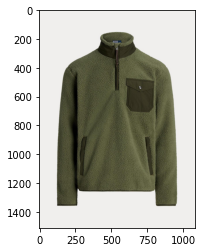

In [277]:
imshow(image)

In [278]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)

In [279]:
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

In [280]:
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

In [281]:
with torch.no_grad():
  prediction = model(x)[0][0]

In [282]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)

In [283]:
mask = unpad(mask, pads)

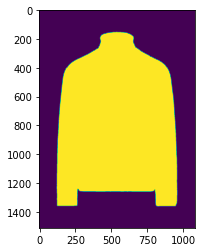

In [284]:
imshow(mask)

In [285]:
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)).astype(np.uint8), 0.5, 0)

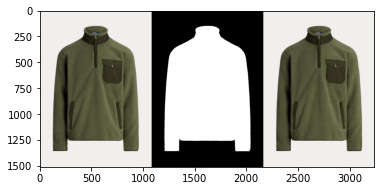

In [286]:
imshow(np.hstack([image, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255, dst]))

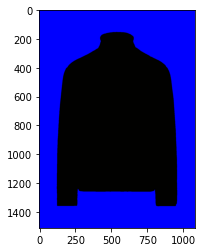

In [320]:
blue = (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)+(0,0,255)).astype(np.uint8)
imshow(blue)

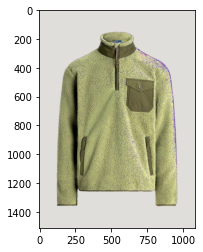

In [328]:
image_test = image*2
imshow(image_test)

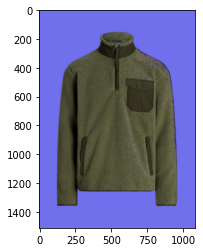

In [329]:
dst = cv2.addWeighted(blue, 0.5 , image_test, 0.5, 0)
imshow(dst)

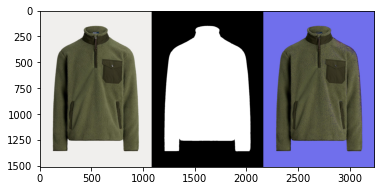

In [330]:
imshow(np.hstack([image, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255, dst]))

In [41]:
import colorsys
from PIL import Image

# Входной файл
filename = f'/content/SCP_task2/cloths/img{rand}.jpeg'

# Целевое значение цвета
# Оттенок равен 0 для красного, 120 для зеленого и 240 для синего. Мы можем настроить 360 значений от 0 до 355 для достижения различных преобразований тонов
target_hue = 240

# Прочитайте на картинке и конвертируйте его в значение цвета RGB
image = Image.open(filename).convert('RGB')

# Отдельные значения цвета RGB
image.load()
r, g, b = image.split()
result_r, result_g, result_b = [], [], []

# Обрабатывать каждый пиксель по очереди
for pixel_r, pixel_g, pixel_b in zip(r.getdata(), g.getdata(), b.getdata()):

    # Преобразовать в значение цвета HSV
    h, s, v = colorsys.rgb_to_hsv(pixel_r / 255., pixel_b / 255., pixel_g / 255.)
    
    # Переключиться обратно на систему цветов RGB
    rgb = colorsys.hsv_to_rgb(target_hue, s, v)
    pixel_r, pixel_g, pixel_b = [int(x * 255.) for x in rgb]
    
    # Сохранить результат каждого пикселя
    result_r.append(pixel_r)
    result_g.append(pixel_g)
    result_b.append(pixel_b)

r.putdata(result_r)
g.putdata(result_g)
b.putdata(result_b)

# Объединить картинки
image = Image.merge('RGB', (r, g, b))

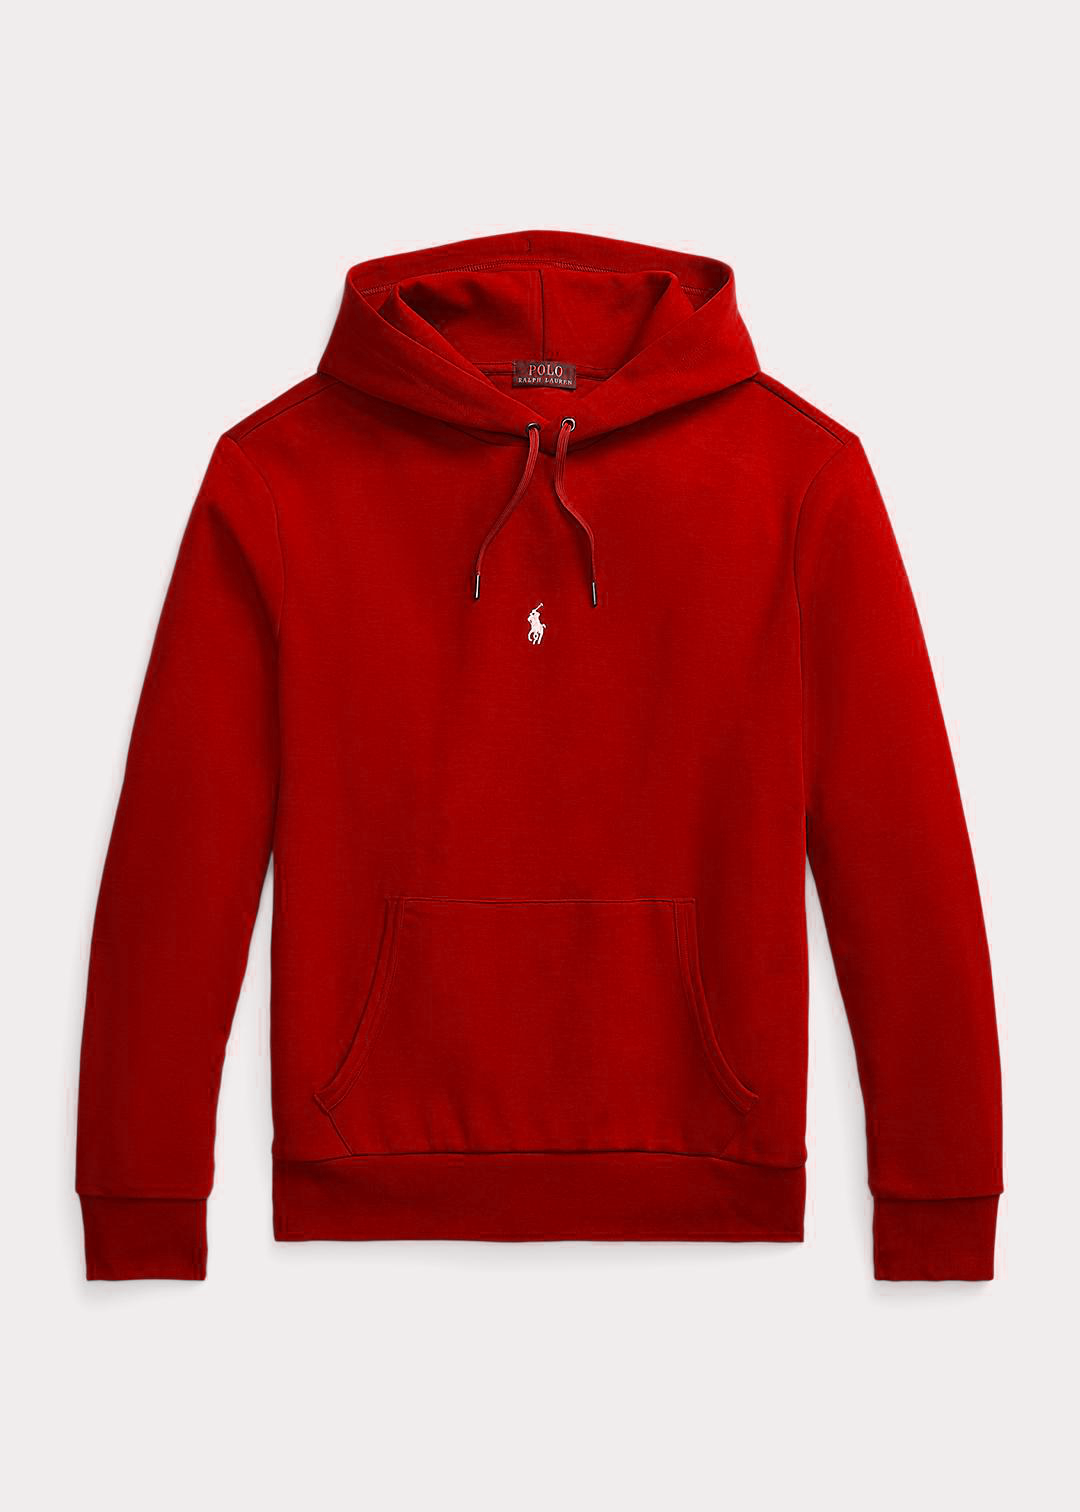

In [42]:
image

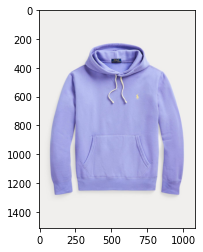

In [225]:
new = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)).astype(np.uint8), 0.5, 0)
imshow(new)